# Room Condition -> temperature.log

## turn log into dataframe

In [1]:
import pandas as pd

log_data  = open('temperature.log', 'r', encoding='UTF-8')
split_list = []

for line in log_data:
    thing1 = line.split(' ')  # logfile split data by using " "
    time = thing1[0][:]     # item 1 is time 
    temp = thing1[1][5:9]
    humid = thing1[4][9:14]
    split_list.append([time, temp, humid])

In [2]:
raw_data = pd.DataFrame(split_list, columns=['time', 'temp', 'humid'])

In [5]:
print(raw_data.iloc[0,0],type(raw_data.iloc[0,0]))
print(raw_data.iloc[0,1],type(raw_data.iloc[0,1]))

1572253860.471596 <class 'str'>
25.0 <class 'str'>


In [4]:
raw_data.head(5)

,time,temp,humid
0,1572253860.471596,25.0,57.0
1,1572253881.413853,25.0,57.0
2,1572253897.210405,25.0,57.0
3,1572253900.298323,25.0,57.0
4,1572253908.529868,25.0,57.0


## split data

In [6]:
temp_data = raw_data[raw_data["time"].between("1574985600","1575676800")]

In [7]:
temp_data.head(5)

,time,temp,humid
354043,1574985601.309857,21.0,73.0
354044,1574985604.395377,21.0,73.0
354045,1574985607.455670,21.0,73.0
354046,1574985610.523921,21.0,73.0
354047,1574985613.584324,21.0,73.0


In [8]:
len(temp_data)

188310

## turn str into float and round 

In [9]:
def trans_round_float(number):
    try:
        return round(float(number))
    except:
        return 0

In [11]:
temp_data.iloc[:,0] = list(map(trans_round_float, temp_data.iloc[:,0]))

temp_data.iloc[:,1] = list(map(trans_round_float, temp_data.iloc[:,1]))

/home/projectx/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
type(temp_data.iloc[2,1])

numpy.int64

In [13]:
temp_data.head(5)

,time,temp,humid
354043,1574985601,21,73.0
354044,1574985604,21,73.0
354045,1574985607,21,73.0
354046,1574985611,21,73.0
354047,1574985614,21,73.0


In [15]:
temp_data_new = temp_data.reset_index()

In [16]:
temp_data_new.head()

,index,time,temp,humid
0,354043,1574985601,21,73.0
1,354044,1574985604,21,73.0
2,354045,1574985607,21,73.0
3,354046,1574985611,21,73.0
4,354047,1574985614,21,73.0


In [17]:
temp_data_new = temp_data_new.drop(['index'], axis=1)

In [18]:
temp_data_new.head()

,time,temp,humid
0,1574985601,21,73.0
1,1574985604,21,73.0
2,1574985607,21,73.0
3,1574985611,21,73.0
4,1574985614,21,73.0


In [19]:
temp_data_new.to_csv('temp_data_new.csv')

In [62]:
temp_data.iloc[-1,0]

1575857510

In [51]:
import time
from datetime import datetime
def timestamp_to_datetime(timestamp):
    """
    :param timestamp: 10未整數時間戳記 (1456402864242)
    :return: 返回 datetime 格式 {datetime}2016-02-25 20:21:04.242000
    """
    
    local_dt_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S.%f')
    return local_dt_time

In [52]:
temp_data["time"].head(5)

0    1572253860
1    1572253881
2    1572253897
3    1572253900
4    1572253909
Name: time, dtype: int64

In [53]:
n =  timestamp_to_datetime(temp_data["time"].iloc[0])
n 

'2019-10-28 17:11:00.000000'

## split data

In [54]:
temp_data.iloc[-3:,:]

,time,temp,humid
542368,1575857453,21.0,56.0
542369,1575857472,21.0,56.0
542370,1575857510,21.0,56.0


In [56]:
temp_data_new = temp_data.iloc[-200000:,:]
temp_data_new.to_csv('temp_data_new.csv')

## plot

In [10]:
len(temp_data)

542371

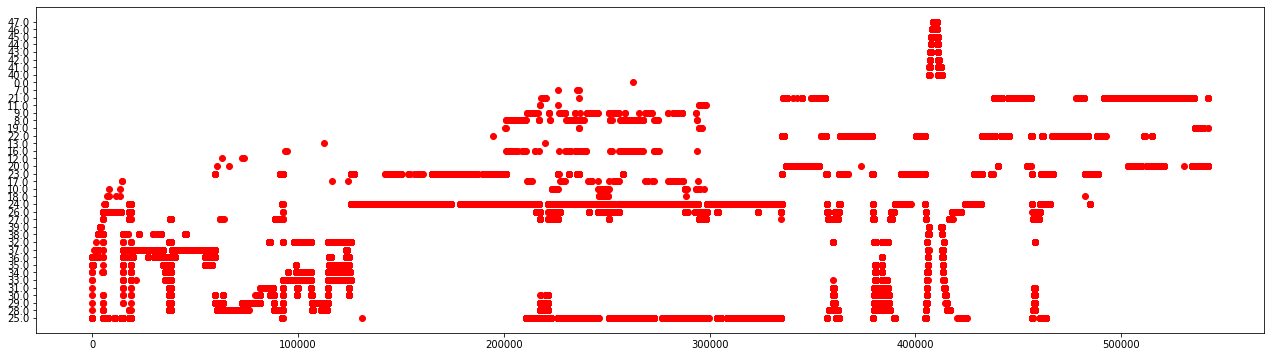

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

f, ax = plt.subplots(figsize=(22, 6))
plt.scatter(temp_data.index,temp_data['temp'],color='red')
# plt.xlim(['2019-10-30 19:29:21','2019-11-26 12:30:17'])

# plt.legend()
plt.show()